### Анализ почтового индекса

In [1]:
#подключение бибилиотек
import numpy as np #для обработки массивов
import pandas as pd #для анализа данных
import matplotlib.pyplot as plt для гистограмм, диаграмм

In [3]:
 data = pd.read_csv('data.csv')  #чтение файла csv в объект dataframe

In [4]:
data.head() #возвращает записи из начала датафрейма

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
#Проверка уникального почтового индекса
data.statezip.value_counts() #для получения Series , содержащего уникальные значения

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

Все почтовые индексы Вашингтона. Проведем корреляционный анализ почтовых индексов

<AxesSubplot:xlabel='price', ylabel='statezip'>

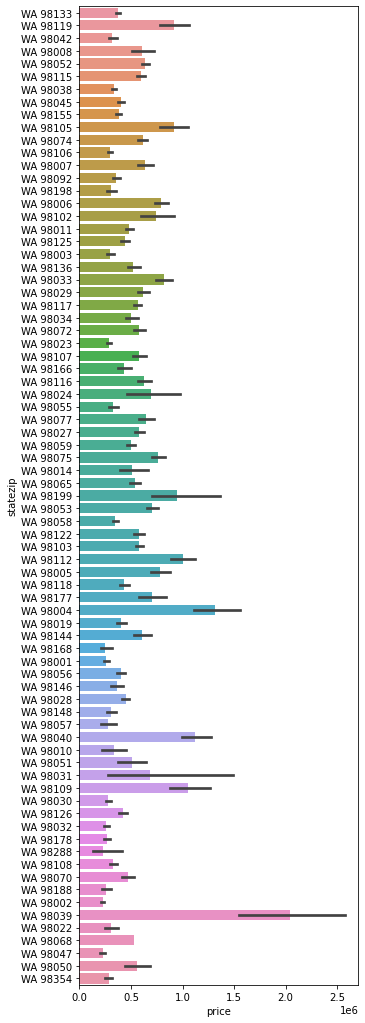

In [8]:
import seaborn as sns #библиотека визуализации данных
%matplotlib inline

a4_dims = (5, 18)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax = ax, x = data.price, y = data.statezip)

C:\Users\Nata\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

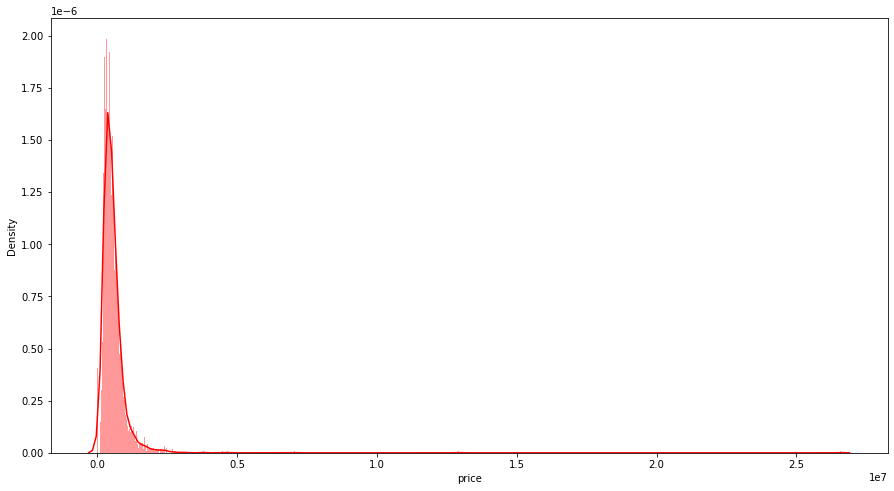

In [9]:
#Посмотрим на распределение цены
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(a = data.price, bins = 1000, color = 'r', ax = ax)

In [10]:
#Сгруппируем по цене
data.price.agg([min, max])

min           0.0
max    26590000.0
Name: price, dtype: float64

In [11]:
#Количество элементов с ценой = 0
len(data[(data.price == 0)])

49

### Анализ всех экземпляров, цена которых равна 0

In [12]:
#Получение всех этих экземпляров
zero_price = data[(data.price == 0)].copy()
zero_price.shape #массив

(49, 18)

In [13]:
zero_price.head() #возвращает записи из начала датафрейма

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA


C:\Users\Nata\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

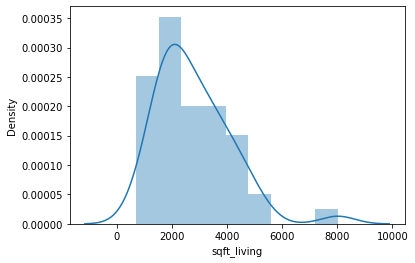

In [14]:
#Получим уникальное значение наиболее важных признаков
sns.distplot(zero_price.sqft_living)

Большинство домов по нулевой цене находятся в диапазоне от 1000 до 5000 кв. футов.

In [15]:
#найдем больше корреляции между домами с нулевой ценой
zero_price.agg([min, max, 'mean', 'median'])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
min,2014-05-05 00:00:00,0.0,1.000000,1.00000,720.000000,3500.000000,1.0,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000,101-127 247th Ave SE,Auburn,WA 98001,USA
max,2014-07-08 00:00:00,0.0,6.000000,6.25000,8020.000000,188200.000000,3.0,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000,9243 NE 20th St,Woodinville,WA 98199,USA
mean,NaN,0.0,3.979592,2.69898,2787.142857,16453.306122,1.5,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286,NaN,NaN,NaN,NaN
median,NaN,0.0,4.000000,2.50000,2600.000000,9000.000000,1.5,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000,NaN,NaN,NaN,NaN


Используем общие диапазоны из приведенной выше таблицы, чтобы получить аналогичные записи из исходного набора данных, и ненулевую цену, чтобы установить значения 0 ценовых экземпляров.

In [16]:
sim_from_ori = data[(data.bedrooms == 4) & 
                  (data.bathrooms > 1) & 
                  (data.bathrooms < 4) & 
                  (data.sqft_living > 2500) & 
                  (data.sqft_living < 3000) & 
                  (data.floors < 3) & 
                  (data.yr_built < 1970)].copy()

In [17]:
sim_from_ori.shape

(79, 18)

In [18]:
sim_from_ori.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
11,2014-05-02 00:00:00,1400000.0,4.0,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
172,2014-05-06 00:00:00,407000.0,4.0,2.25,2810,23400,1.0,0,1,3,1710,1100,1958,2004,23024-23198 17th Ave S,Des Moines,WA 98198,USA
207,2014-05-06 00:00:00,360000.0,4.0,2.00,2680,18768,1.0,0,0,5,2680,0,1965,0,31607-31633 44th Ave S,Auburn,WA 98001,USA
257,2014-05-07 00:00:00,749950.0,4.0,2.75,2600,6050,2.0,0,0,5,1960,640,1949,0,4140 53rd Ave SW,Seattle,WA 98116,USA
261,2014-05-07 00:00:00,581000.0,4.0,2.00,2510,13695,1.0,0,0,4,1280,1230,1961,2001,11105 126th Ave NE,Kirkland,WA 98033,USA


In [19]:
#Получим среднюю цену этих экземпляров
sim_from_ori.price.mean()

735475.0370705189

Давайте подтвердим это, сравнив с другой ценой на дом того же года постройки и с таким же квадратным футом.

In [20]:
yr_sqft = data[(data.sqft_living > 2499) & (data.sqft_living < 2900)].copy()
yr_price_avg = yr_sqft.groupby('yr_built').price.agg('mean')

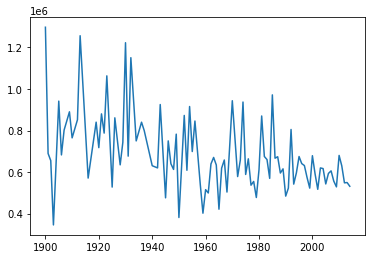

In [21]:
plt.plot(yr_price_avg)

Это подтверждает наше предположение. Средн. стоимость таких домов от 600000 до 800000

### Замена всех нулевых ценовых значений на $730000

In [23]:
data.price.replace(to_replace = 0, value = 735000, inplace = True) #для создания строки путем замены
len(data[(data.price == 0)])

0

In [25]:
data.head() #возвращает записи из начала датафрейма

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Сокращение функций

Поскольку sqft_living — самая важная функция, а sqft_living и sqft_above тесно взаимосвязаны, удалим функцию sqft_above.

In [26]:
data.drop(['sqft_above'], axis = 1, inplace = True) #удалить
data.shape #массив

(4600, 17)

### Обработка порядка индекса

При удалении некоторых строк наш исходный индекс набора данных изменяется. Давайте исправим это

In [27]:
data = data.reset_index() #переиндексировать строки
data.info() #справка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4600 non-null   int64  
 1   date           4600 non-null   object 
 2   price          4600 non-null   float64
 3   bedrooms       4600 non-null   float64
 4   bathrooms      4600 non-null   float64
 5   sqft_living    4600 non-null   int64  
 6   sqft_lot       4600 non-null   int64  
 7   floors         4600 non-null   float64
 8   waterfront     4600 non-null   int64  
 9   view           4600 non-null   int64  
 10  condition      4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float